In [2]:
#TODO: 
# [\n07\nG11C019/08\nA01H005/00\n]
# [\n07\nA41D001/06\n]

# WHAT DOES THE 07 STAND FOR? 
# is this universal? do all patents have this structure? over all years?


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

df = pd.read_parquet("data/df_with_embeddings.parquet")


In [3]:
df.head(2)

,title,publication_number,publication_date,application_type,ipc_classifications,national_classifications,inventors,abstract,description,claims,abstract_characters,abstract_tokens,claims_characters,claims_tokens,description_characters,description_tokens,title_characters,title_tokens,abstract_embeddings
0,Anthurium andreanum plant named 'Anthbondem',20050005336,20050106,utility,[\n07\nG11C019/08\nA01H005/00\n],[\nUS\nPLT365000\n],"[{'first_name': 'Jan', 'last_name': 'Dijk'}]",\nA new and distinct cultivar of Anthurium and...,\n\nLATIN NAME OF THE GENUS AND SPECIES OF THE...,1\n. A new and distinct\nAnthurium andreanum\n...,643,129,105,28,9258,2306,44,13,"[[-0.024430248886346817, 0.0164019837975502, 0..."
1,Novelty jeans,20050000001,20050106,utility,[\n07\nA41D001/06\n],[\nUS\n002227000\n],"[{'first_name': 'Tina', 'last_name': 'Goldkind'}]",\nNovelty play jeans for children which includ...,\n\nBACKGROUND OF THE INVENTION \n The inventi...,1\n. A novelty jeans formed of suitable fabric...,507,104,6428,1398,23051,5122,13,4,"[[-0.01965159736573696, -0.0008666732464917004..."


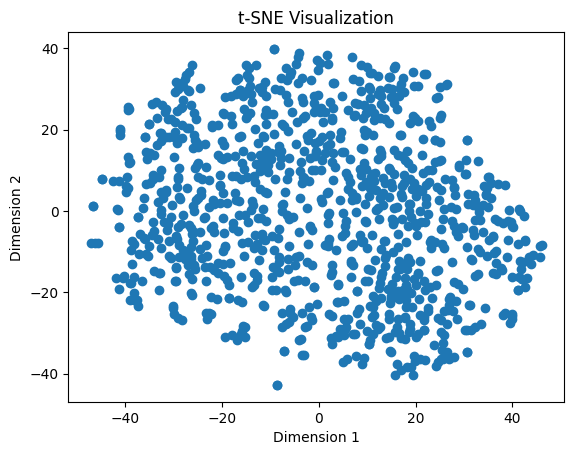

In [5]:
# print the embeddings and put them by colours deppending on the industry
# the industry column is ipc_classifications


# ['\n07 what is the 07?/ 
# CAN we have multiple IPC codes? 
# \nG11C019/08
# \nA01H005/00\n'

"""
https://www.wipo.int/edocs/pubdocs/en/wipo-guide-ipc-2023-en-guide-to-the-international-patent-classification-2023.pdf
PC Code Structure: An IPC code is structured as follows:

Section: The first letter represents the section of technology 
(e.g., A for Human Necessities).

Class: The two digits following the section letter represent the class 
(e.g., 01 for Agriculture; Fishing...).

Subclass: The letter after the class number represents the subclass 
(e.g., H for Plant breeding).

Group: The first one to three digits after the subclass letter indicate group
 (e.g., 005 for specific types of plants or methods for their breeding).

Subgroup: Finally, the number after the slash (/) represents the subgroup, 
providing further details
 (e.g., 00 represents a specific aspect of the plant breeding method).
 """
# create a dictionary to map the industry to a color

# create a function that given the icp code returns the industry
def split_ipc_code(ipc_list_codes):
    # get the first ipc code
    ipc_code = ipc_list_codes[0].split('\n')[2]
    
    # first letter
    ipc_section = ipc_code[0]
    # ipc_section + 2 digits
    ipc_class = ipc_code[0:3]
    # ipc_class + 1 letter
    ipc_subclass = ipc_code[0:4]
    # split using /
    ipc_group = ipc_code.split('/')[0]
    ipc_subgroup = ipc_code

    return ipc_section, ipc_class, ipc_subclass, ipc_group, ipc_subgroup


df["section"] = df['ipc_classifications'].apply(lambda x: split_ipc_code(x)[0])


In [6]:
# print all section values 
df["section"].value_counts()

#  IPC eighth edition consisting of eight sections, 129 classes, 639 subclasses, 7,314 main groups, and 61,397 subgroups

"""
A HUMAN NECESSITIES
B PERFORMING OPERATIONS; TRANSPORTING
C CHEMISTRY; METALLURGY
D TEXTILES; PAPER
E FIXED CONSTRUCTIONS
F MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS;
BLASTING
G PHYSICS
H ELECTRICITY
"""

'\nA HUMAN NECESSITIES\nB PERFORMING OPERATIONS; TRANSPORTING\nC CHEMISTRY; METALLURGY\nD TEXTILES; PAPER\nE FIXED CONSTRUCTIONS\nF MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS;\nBLASTING\nG PHYSICS\nH ELECTRICITY\n'

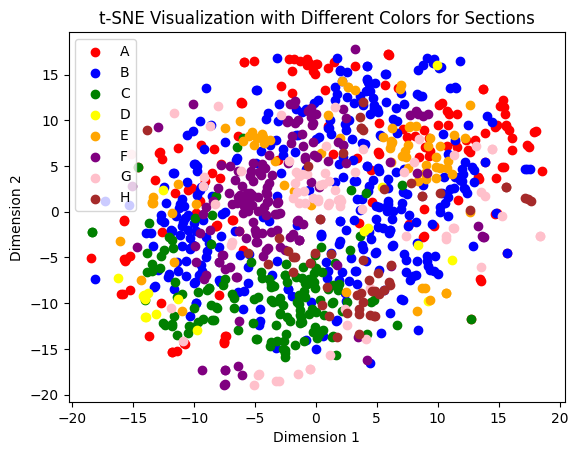

In [15]:
# t-SNE
# we will take the first vector embedding from the abstracts and use t-SNE to visualize the data 

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# take the first vector embedding from the abstracts
X = np.array([np.array(x[0]) for x in df['abstract_embeddings']])
# create t-SNE object
# tsne = TSNE()
# TODO: play with hyperparameters
tsne = TSNE(n_components=2, perplexity=30, early_exaggeration=12, learning_rate=200)

# perform t-SNE on the embedding vectors
X_tsne = tsne.fit_transform(X)

# create a color map for different sections
section_colors = {
    'A': 'red',
    'B': 'blue',
    'C': 'green',
    'D': 'yellow',
    'E': 'orange',
    'F': 'purple',
    'G': 'pink',
    'H': 'brown'
}

# hyperparameter tuning


# plot the t-SNE visualization with different colors for sections
for section in section_colors:
    plt.scatter(X_tsne[df['section'] == section, 0], X_tsne[df['section'] == section, 1], c=section_colors[section], label=section)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Visualization with Different Colors for Sections')
plt.legend()
plt.show()


In [16]:
# # the same with umap
# import umap.umap_ as umap
# reducer = umap.UMAP()
# embedding = reducer.fit_transform(X)
# iterable_of_colors = [section_colors[section] for section in df['section']]
# plt.scatter(embedding[:, 0], embedding[:, 1], c=iterable_of_colors, cmap='Spectral', s=5)
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP projection of the dataset', fontsize=24)
# plt.show()


In [ ]:
# are there female authors? T (use database of US names)
# did the patents get accepted? Y ??

# Are Patent Examiners Gender Neutral?

For gender name coding, I relied on the gender distributions of first names provided by the U.S. Social Security
Administration. To avoid detecting differential behavior to non-US inventors, I include only
patent applications submitted by US inventors.

The USPTO Patents View data, which includes detailed information on both granted patents and patent applications

In [ ]:
# open "C:\Users\Roberto\Downloads\g_application.tsv\g_application.tsv"

import pandas as pd
import numpy as np

application_granted_df = pd.read_csv("C:/Users/Roberto/Downloads/g_application.tsv/g_application.tsv", sep='\t')


In [29]:
application_granted_df.tail()

# this data is pure rubish! the date is obviously wrong!!
# what is this date? 

# sort by filing_date
application_granted_df.sort_values(by='filing_date', ascending=False)


,application_id,patent_id,patent_application_type,filing_date,series_code,rule_47_flag
8699308,6848010,4732727,6,9186-04-03,06,0.0
8699307,6474610,4474874,6,9183-03-11,06,0.0
8699306,5967990,4255928,5,9178-12-11,05,0.0
8699305,5786216,4135654,5,9177-04-11,05,0.0
8699304,5691622,4041523,5,9176-06-01,05,0.0
...,...,...,...,...,...,...
3,05518570,3936670,05,1074-10-29,05,0.0
2,05518254,3941467,05,1074-10-29,05,0.0
1,05508062,3933359,05,1074-09-23,05,0.0
0,05497504,3963197,05,1074-08-14,05,0.0


In [34]:
# string 
type(application_granted_df["filing_date"][0])

# get the patents that have the filing date 2005
application_granted_df["filing_date"] = pd.to_datetime(application_granted_df["filing_date"], format='%Y-%m-%d', errors='coerce')
application_granted_df["filing_date"].dt.year.value_counts()

In [25]:
# this is a list of all granted applications
# Thus, if the application is not in this list, it was not granted


# merge the granted applications with the df
df.head(2)


,title,publication_number,publication_date,application_type,ipc_classifications,national_classifications,inventors,abstract,description,claims,abstract_characters,abstract_tokens,claims_characters,claims_tokens,description_characters,description_tokens,title_characters,title_tokens,abstract_embeddings,section
0,Anthurium andreanum plant named 'Anthbondem',20050005336,20050106,utility,[\n07\nG11C019/08\nA01H005/00\n],[\nUS\nPLT365000\n],"[{'first_name': 'Jan', 'last_name': 'Dijk'}]",\nA new and distinct cultivar of Anthurium and...,\n\nLATIN NAME OF THE GENUS AND SPECIES OF THE...,1\n. A new and distinct\nAnthurium andreanum\n...,643,129,105,28,9258,2306,44,13,"[[-0.024430248886346817, 0.0164019837975502, 0...",G
1,Novelty jeans,20050000001,20050106,utility,[\n07\nA41D001/06\n],[\nUS\n002227000\n],"[{'first_name': 'Tina', 'last_name': 'Goldkind'}]",\nNovelty play jeans for children which includ...,\n\nBACKGROUND OF THE INVENTION \n The inventi...,1\n. A novelty jeans formed of suitable fabric...,507,104,6428,1398,23051,5122,13,4,"[[-0.01965159736573696, -0.0008666732464917004...",A


In [20]:
# get a list of the paten_ids that are repeated (granted patents)
granted_patents = application_granted_df[application_granted_df['patent_id'].duplicated()]['patent_id'].tolist()

In [21]:
granted_patents

[]